In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import cufflinks as cf
cf.set_config_file(offline = True)


Calculating VaR of a Portfolio using Monte carlo simulation

VaR is a static measure which measures the maximum loss a portfolio can experience for a given confidence interval at a given liquidity horizon
10 day VaR @95 = $100 , means P[10 day loss > 100 = 5%] or P[10 day loss<100 = 95%]
We need a return/Loss(PnL) distribution and then cut a quantile of desired significance level

Three methods of finding VaR 

Parametric VaR - we assume returns follow a normal distribution and according to parameters of normal dist. we calculate VaR
Historical simulation - we generate return distribution from historical data and apply those return in current portfolio as if history will repeat itself
Monte Carlo VaR - we generate return distribution using random numbers 
    

In [3]:
# Lets define parameters
# scalar parameters 

mu1 = 0.1
mu2 = 0.15
sigma1 = 0.1
sigma2 = 0.2 
rho = 0.5   # correlation 
w = 0.4     # weight of one instrument


# creating matrix 

MU = np.array([[mu1,mu2]]).T        # By default numpy array is designed in row fashion but we require it in column fashion( just a convention of vector matrix)
COV = np.array([[sigma1**2,rho*sigma1*sigma2],[rho*sigma1*sigma2,sigma2**2]])     # creating a  variance-covariance matrix
W = np.array([[w,1-w]]).T


In [4]:
# calculate paarametric VaR
z = norm.ppf(0.95)  # x = mu - z*sigma as we are getting positive z

# we need portfolio expected return
mu_p = (W.T@MU).item() 

# we calculate portfolio standard deviation
sigma_p = np.sqrt(W.T@COV@W).item()   # we do squareroot of weights transpose * var-cov maatrix * weights 

# now finally lets calculate paarametric VaR
VaR = mu_p - sigma_p * z   # we arrive at this quantile from a return distribution 
VaR     # the VaR we arrived at is a worst case returns and after we apply this return in our portfolio we get a absolute value

-0.107224163704258

In [5]:
# calculate Monte carlo VaR 

# r1 ~ N(mu1,sigma1**2), r2 ~ N(mu2,sigma2**2)
sims = 10000


# first we need to generate uncorrelated random numbers 
z1 = np.random.randn(sims)
z2 = np.random.randn(sims)

r1_uncor = mu1 + sigma1*z1
r2_uncor = mu2 + sigma2*z2

# now generate correlated random numbers using z1 and z2
z3 = z1 * rho + np.sqrt(1-rho**2)*z2  

np.corrcoef(z1,z3)  # checking whether correlation is introduced



array([[1.        , 0.49561731],
       [0.49561731, 1.        ]])

In [6]:
r1 = mu1 + sigma1*z1
r2 = mu2 + sigma2*z3

np.corrcoef(r1,r2)


array([[1.        , 0.49561731],
       [0.49561731, 1.        ]])

In [7]:
r = pd.DataFrame()
r['r1'] = r1
r['r2'] = r2
r

,r1,r2
0,0.099373,0.148236
1,0.161577,-0.005924
2,0.064613,0.014013
3,0.090364,0.181966
4,-0.082840,-0.318116
...,...,...
9995,-0.001118,0.102045
9996,-0.034693,0.183865
9997,-0.075190,-0.202156
9998,0.219189,0.356942


Text(0, 0.5, 'r2')

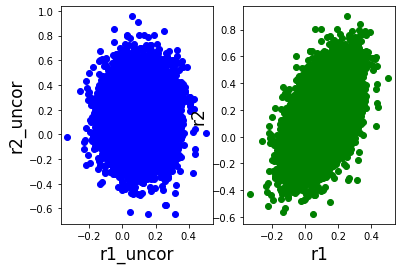

In [8]:
# generate plots to visualise correlation

# for uncorrelated random variable
plt.subplot(1,2,1)
plt.plot(r1_uncor,r2_uncor,linestyle = "",marker = "o", color = "blue")
plt.xlabel('r1_uncor', fontsize = 17)
plt.ylabel('r2_uncor', fontsize = 17)


# for correlated random variable

plt.subplot(1,2,2)
plt.plot(r1,r2, linestyle = "", marker = "o", color = "green")
plt.xlabel('r1', fontsize = 17)
plt.ylabel('r2', fontsize = 17)

In [9]:
r['rp'] = r@W   # we found out return portfolio simply by weighing returns  
r 

,r1,r2,rp
0,0.099373,0.148236,0.128691
1,0.161577,-0.005924,0.061076
2,0.064613,0.014013,0.034253
3,0.090364,0.181966,0.145325
4,-0.082840,-0.318116,-0.224006
...,...,...,...
9995,-0.001118,0.102045,0.060780
9996,-0.034693,0.183865,0.096442
9997,-0.075190,-0.202156,-0.151369
9998,0.219189,0.356942,0.301840


In [12]:
r['rp'].iplot('hist')

In [13]:
np.quantile(r['rp'],0.05) # VaR by simulation result,close to analytical solution but not exact due to less number of simulations


-0.1067706295923563